In [1]:
import numpy as np
import pandas as pd
from scipy.special import gamma, factorial

In [41]:
def rho(x, y, H, R):
    if H <= 0.75:
        beta = 0
        c2 = H
        c0 = 1 - c2
    else:
        beta = 2*H*(2-2*H)/(3*R*(R**2-1))
        c2 = (2*H-beta*(R-1)**2*(R+2))/2
        c0 = beta*(R-1)**3+1-c2
    h = np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)
    if h <= 1:
        cov = c0 + c2*h**2 - h**(2*H)
    elif h < R:
        cov = beta*(R-h)**3/h
    else:
        cov = 0
    return c0, c2, cov

def R2_fft(n, H, R):
    t1, t2 = np.linspace(0, R/np.sqrt(2), n+1), R*np.linspace(0, R/np.sqrt(2), n+1)
    cov = np.zeros((n+1, n+1))
    c0, c2 = rho([t1[0], t2[0]], [t1[0], t2[0]], H, R)[0:2]
    for i in range(0, n+1):
        for j in range(0, n+1):
            cov[j, i] = rho([t1[i], t2[j]], [t1[0], t2[0]], H, R)[2]
    s, S = np.zeros((2*n, 2*n)), np.zeros((2*n, 2*n))
    s[0:(n+1),:] = np.c_[cov[:,0:n], cov[:,n], cov[:,n-1:0:-1]]
    S = np.r_[s[0:n,:], s[n,:].reshape(1, 2*n), s[n-1:0:-1,:]]
    S_tilde = np.fft.fft2(S)
    return c0, c2, S_tilde

def LC_complex_rv(n):
    x_1, x_2 = np.random.multivariate_normal(np.zeros(2*n), np.diag(np.ones(2*n)), 2*n), np.random.multivariate_normal(np.zeros(2*n), np.diag(np.ones(2*n)), 2*n)
    x = np.zeros((2*n, 2*n), dtype=np.complex)
    for i in range(0, 2*n):
        for j in range(0, 2*n):
            x[i, j] = np.complex(x_1[i,j], x_2[i,j])
    return x

def LC_small_t(n, t1, t2):
    z1, z2 = np.random.normal(0, 1, 1), np.random.normal(0, 1, 1)
    t = np.zeros((n+1, n+1))
    for i in range(0, n+1):
        for j in range(0, n+1):
            t[i,j] = t1[i]*z1 + t2[j]*z2
    return t

def LC_fBm(n, H, R):
    t1, t2 = np.linspace(0, R/np.sqrt(2), n+1), R*np.linspace(0, R/np.sqrt(2), n+1)
    c0, c2, S_tilde = R2_fft(n, H, R)
    x = LC_complex_rv(n)
    y = np.fft.fft2(np.sqrt(S_tilde)*x)
    y1_tilde = (1/(2*n))*y.real[0:(int(n/2)+1),0:(int(n/2)+1)]
    y1 = np.zeros((int(n/2)+1, int(n/2)+1))
    t = LC_small_t(int(n/2), t1, t2)
    y1 = y1_tilde - y1_tilde[0,0] + np.sqrt(2*c2)*t
    return np.sqrt(2**(H-1))*y1

In [43]:
Y1 = LC_fBm(600, 0.1, 2)
Y2 = LC_fBm(600, 0.3, 2)
Y3 = LC_fBm(600, 0.5, 2)
Y4 = LC_fBm(600, 0.7, 2)

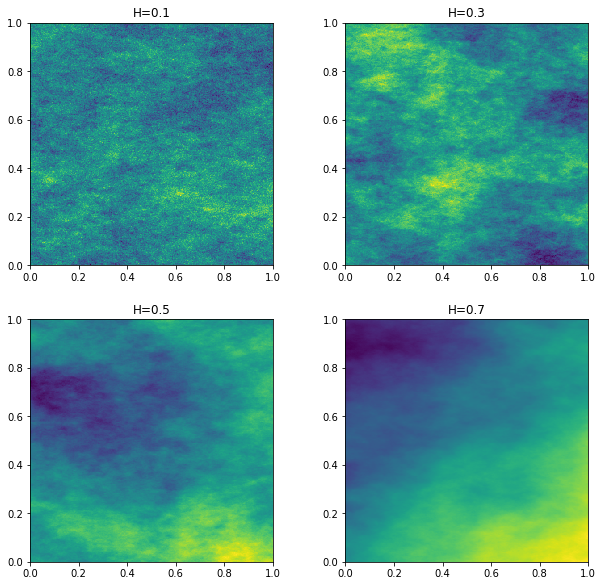

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=False)

plt.subplots_adjust(wspace = 0.3)
im1 = axs[0,0].imshow(Y1, cmap='viridis', interpolation='nearest', origin='lower', extent = [0,1,0,1])
axs[0,0].set_ylim(bottom = 0, top = 1)
axs[0,0].set_xlim(left = 0, right = 1)

im2 = axs[0,1].imshow(Y2, cmap='viridis', interpolation='nearest', origin='lower', extent = [0,1,0,1])
axs[0,1].set_ylim(bottom = 0, top = 1)
axs[0,1].set_xlim(left = 0, right = 1)

im1 = axs[1,0].imshow(Y3, cmap='viridis', interpolation='nearest', origin='lower', extent = [0,1,0,1])
axs[1,0].set_ylim(bottom = 0, top = 1)
axs[1,0].set_xlim(left = 0, right = 1)

im1 = axs[1,1].imshow(Y4, cmap='viridis', interpolation='nearest', origin='lower', extent = [0,1,0,1])
axs[1,1].set_ylim(bottom = 0, top = 1)
axs[1,1].set_xlim(left = 0, right = 1)

axs[0,0].set_title("H=0.1")
axs[0,1].set_title("H=0.3")
axs[1,0].set_title("H=0.5")
axs[1,1].set_title("H=0.7")

plt.savefig('fLBs.pdf', bbox_inches = 'tight')

plt.show()